In [120]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands

In [198]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya)

In [204]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

H = H_4by4(Kxa, Kya, Delta=Delta, eps=eps, theta=theta)
dHx, dHy = dH_4by4(Kxa, Kya)

In [205]:
H.shape, dHx.shape, dHy.shape

((4, 4, 200, 200), (4, 4, 200, 200), (4, 4, 200, 200))

In [206]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Delta=Delta, eps=eps, theta=theta)

<IPython.core.display.Javascript object>


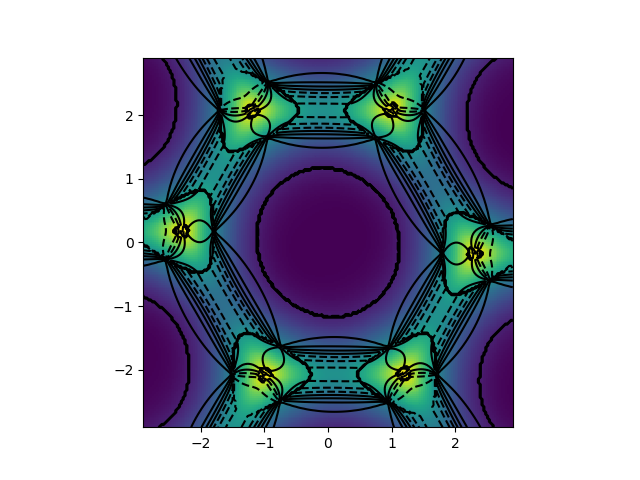

In [207]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

<IPython.core.display.Javascript object>


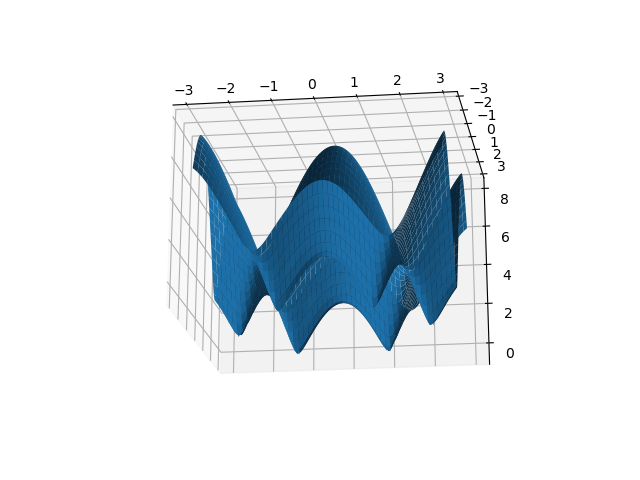

In [209]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kxa, Kya, E[2])

# Brillouin Zone

In [126]:
from blg_strain.utils.lattice import strain_tensor
from blg_strain.utils.const import deltans

In [127]:
%matplotlib notebook

In [128]:
strain = strain_tensor(eps, theta)
I = np.eye(2)

In [129]:
a1, a2 = deltans[2], deltans[4]  # lattice basis vectors
a1p = (I + strain).dot(a1)
a2p = (I + strain).dot(a2)

a1 = np.append(a1, 0) # make 3D
a2 = np.append(a2, 0)
a1p = np.append(a1p, 0) # make 3D
a2p = np.append(a2p, 0)

a1, a2, a1p, a2p

(array([0.8660254, 1.5      , 0.       ]),
 array([-0.8660254,  1.5      ,  0.       ]),
 array([1.00307392, 1.562625  , 0.        ]),
 array([-0.85173598,  1.47525   ,  0.        ]))

Reciprocal lattice vectors
$$
b_1 = 2\pi \frac{a_2\times \hat{z}}{|a_1\times a_2|}
$$
$$
b_2 = 2\pi \frac{\hat{z}\times a_1}{|a_1\times a_2|}
$$

In [130]:
b1 = 2 * np.pi * np.cross(a2, [0, 0, 1]) / np.linalg.norm(np.cross(a1, a2))
b2 = 2 * np.pi * np.cross([0, 0, 1], a1) / np.linalg.norm(np.cross(a1, a2))
b1p = 2 * np.pi * np.cross(a2p, [0, 0, 1]) / np.linalg.norm(np.cross(a1p, a2p))
b2p = 2 * np.pi * np.cross([0, 0, 1], a1p) / np.linalg.norm(np.cross(a1p, a2p))
b1, b2

(array([ 3.62759873,  2.0943951 , -0.        ]),
 array([-3.62759873,  2.0943951 ,  0.        ]))

In [131]:
vectors = [b1, b2]
vectorsp = [b1p, b2p]

In [132]:
import itertools
from scipy.spatial import Voronoi
from math import atan2

https://github.com/dean0x7d/pybinding/blob/master/pybinding/lattice.py

In [133]:
def get_bz_vertices(vectors):
    points = [sum(n * v for n, v in zip(ns, vectors))
                      for ns in itertools.product([-1, 0, 1], repeat=2)]
    vor = Voronoi([p[:2] for p in points])
    # See scipy's Voronoi documentation for details (-1 indicates infinity)
    finite_regions = [r for r in vor.regions if len(r) != 0 and -1 not in r]
    assert len(finite_regions) == 1
    return [vor.vertices[i] for i in finite_regions[0]]

In [134]:
bz = get_bz_vertices(vectors)
bzp = get_bz_vertices(vectorsp)

<IPython.core.display.Javascript object>


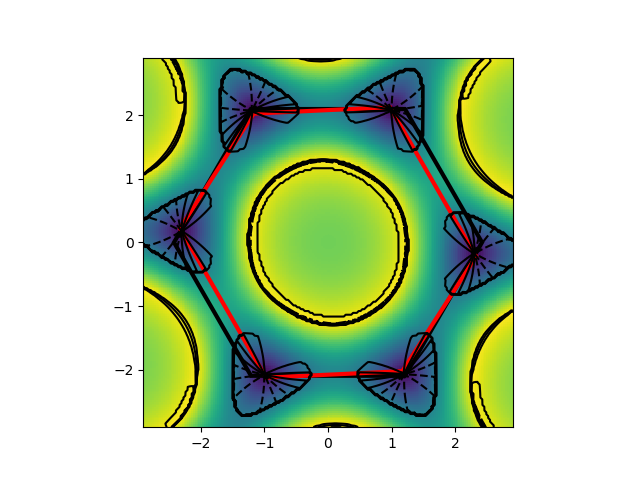

In [135]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

from matplotlib.patches import Polygon
p = Polygon(bz, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bzp, fill=False, color='r', lw=3)
ax.add_patch(p)

# ax.plot([0, b1[0]], [0, b1[1]], 'k')
# ax.plot([0, b2[0]], [0, b2[1]], 'k')

In [64]:
bz_vertices

[array([-1.20919958, -2.0943951 ]),
 array([ 1.20919958, -2.0943951 ]),
 array([2.41839915, 0.        ]),
 array([1.20919958, 2.0943951 ]),
 array([-1.20919958,  2.0943951 ]),
 array([-2.41839915,  0.        ])]

In [136]:
strain = strain_tensor(eps, theta)

In [137]:
strain

array([[0.070875  , 0.05044598],
       [0.05044598, 0.012625  ]])

## Package

In [138]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.utils.lattice import strain_tensor
from blg_strain.utils.lattice import brillouin_zone

In [139]:
eps = 0.1
theta = np.pi/4
# theta = 0

In [140]:
strain0 = strain_tensor(0, 0)
strain = strain_tensor(eps, theta)

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [141]:
bz

[array([ 2.32145463, -0.26083591]),
 array([1.05891461, 2.08227924]),
 array([-1.28445145,  1.95124869]),
 array([-2.32145463,  0.26083591]),
 array([-1.05891461, -2.08227924]),
 array([ 1.28445145, -1.95124869])]

<IPython.core.display.Javascript object>


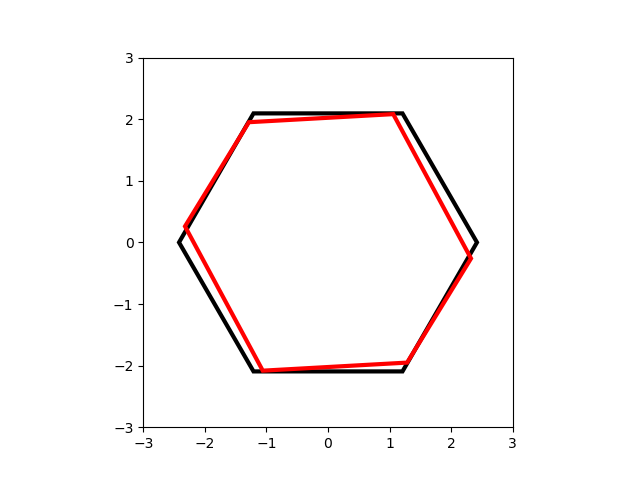

In [142]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
p = Polygon(bz0, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)

Strained BZ is still a Bravais lattice. So we can still look near the distorted K and K' points to get the result over the full BZ

## Find points closest to original K, K'

In [143]:
from blg_strain.utils.const import K

In [144]:
K1 = np.array([K, 0])
K2 = -K1
bz = np.array(bz)

dist2 = ((bz - K1) ** 2).sum(axis=1)
arg = np.argmin(dist2)
K1p = bz[arg]

dist2 = ((bz - K2) ** 2).sum(axis=1)
arg = np.argmin(dist2)
K2p = bz[arg]

In [145]:
K1, K1p, K2, K2p

(array([2.41839915, 0.        ]),
 array([ 2.32145463, -0.26083591]),
 array([-2.41839915, -0.        ]),
 array([-2.32145463,  0.26083591]))

In [146]:
from blg_strain.utils.lattice import strained_K

In [147]:
strained_K(strain, False)

array([ 2.32145463, -0.26083591])

# Playing around with strain

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.lattice import strain_tensor
from blg_strain.lattice import brillouin_zone

In [9]:
eps = 0.1
theta = 0
# theta = 0

In [14]:
strain0 = strain_tensor(0, 0)
strain = strain_tensor(eps, theta)
# strain = np.array([
#     [0.1, 0.2],
#     [0.2, 0.2],
# ])

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [15]:
bz

[array([2.33647064, 0.        ]),
 array([ 0.96134638, -2.12953239]),
 array([-0.96134638, -2.12953239]),
 array([-2.33647064,  0.        ]),
 array([-0.96134638,  2.12953239]),
 array([0.96134638, 2.12953239])]

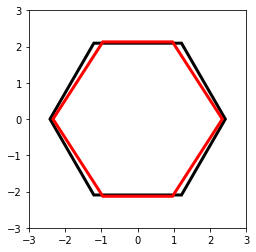

In [16]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
p = Polygon(bz0, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)

# Find energy minima

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.utils.lattice import strained_K, strain_tensor

In [2]:
%matplotlib notebook

In [3]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [4]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

H = H_4by4(Kxa, Kya, Delta=Delta, eps=eps, theta=theta)
dHx, dHy = dH_4by4(Kxa, Kya)

In [20]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, eps=eps, theta=theta)

In [21]:
strain = strain_tensor(eps, theta)
K1p = strained_K(strain)
K2p = strained_K(strain, True)

In [22]:
K1p

array([ 2.32531073, -0.21956524])

<IPython.core.display.Javascript object>


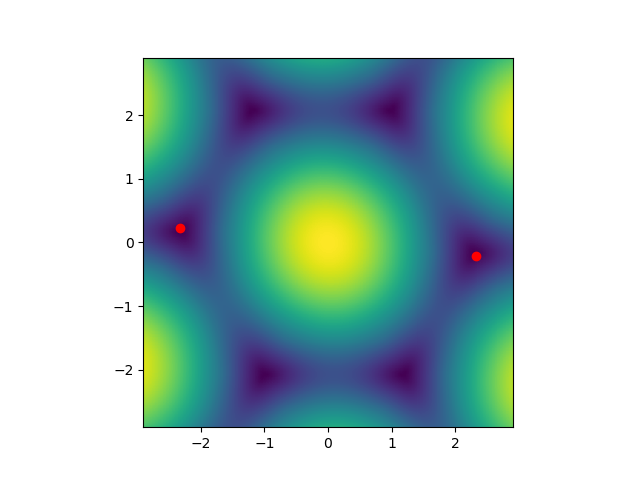

In [23]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2])
# ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)
ax.plot(*K1p, 'or')
ax.plot(*K2p, 'or')

In [24]:
from scipy.interpolate import RectBivariateSpline

In [25]:
spl = RectBivariateSpline(kxa, kya, E[2])

<IPython.core.display.Javascript object>


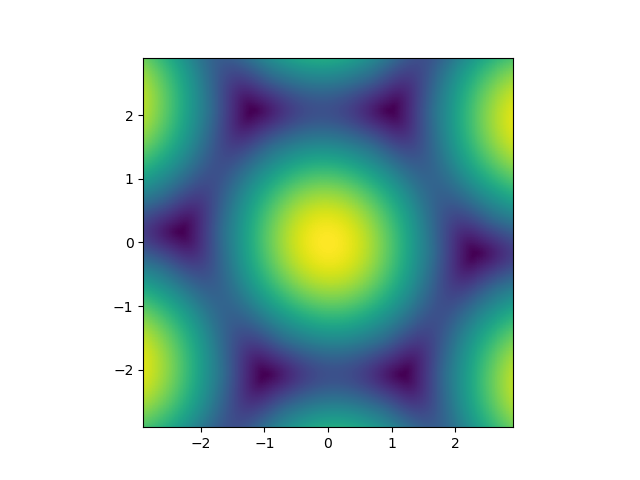

In [26]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, spl(kxa, kya))
ax.set_aspect(1)

In [27]:
from scipy.optimize import minimize

In [28]:
def f(x):
    return spl(*x)
res = minimize(f, K1p)
KD1 = res.x
res = minimize(f, K2p)
KD2 = res.x

In [29]:
E[2].min()

-0.8857292925518189

<IPython.core.display.Javascript object>


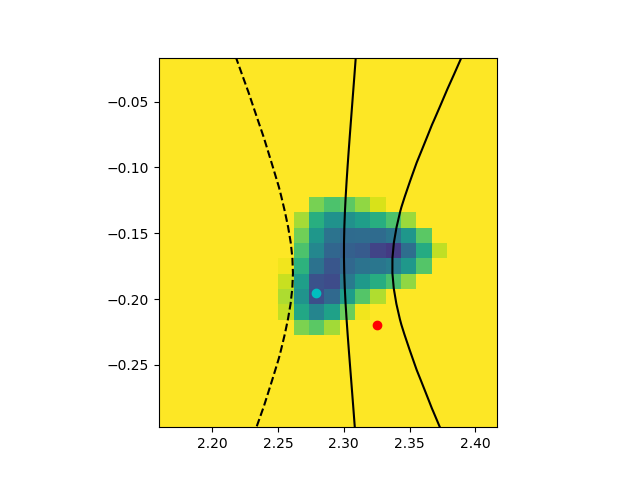

In [30]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2], vmin=-.9, vmax=-0.8)
ax.contour(Kxa, Kya, Psi[0][0].real, colors='k')
ax.set_aspect(1)
ax.plot(*K1p, 'or')
ax.plot(*K2p, 'or')

ax.plot(*KD1, 'oc')
ax.plot(*KD2, 'oc')

# Test function to turn off gammas

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.utils.lattice import strained_K, strain_tensor
from blg_strain.utils.const import set_parameters

In [32]:
%matplotlib notebook

In [33]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [100]:
Delta = 0.01
eps = 0.1,
theta=np.pi/4

In [101]:
set_parameters(['gamma3'])
# set_parameters()

In [102]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, eps=eps, theta=theta)

<IPython.core.display.Javascript object>


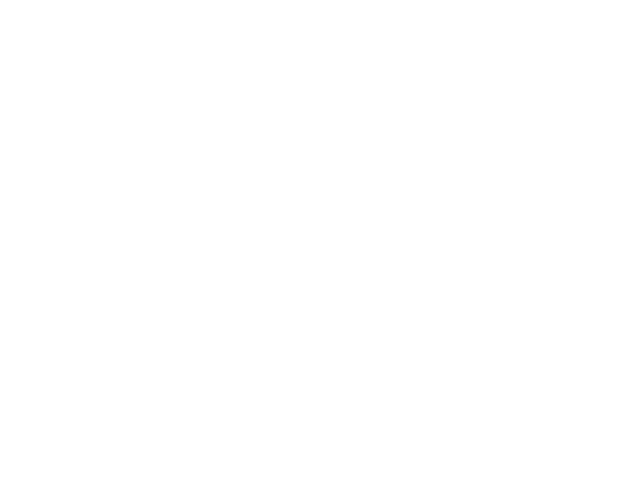

In [103]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

# Try to determine the relationship between shift in Dirac point and strain

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.lattice import strained_K, strain_tensor


In [4]:
%matplotlib notebook

In [5]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [6]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

In [108]:
set_parameters(turn_off=['gamma3', 'gamma4', 'gamman', 'DeltaAB'])
# set_parameters()

In [109]:
from scipy.interpolate import RectBivariateSpline
from scipy.optimize import minimize

In [110]:
K1ps = []
K2ps = []

KD1s = []
KD2s = []

epss = np.linspace(0, 0.02, 10)
for eps in epss:
    kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, eps=eps, theta=theta)
    spl = RectBivariateSpline(kxa, kya, E[2])
    def f(x):
        return spl(*x)
    
    strain = strain_tensor(eps, theta)
    K1ps.append(strained_K(strain))
    K2ps.append(strained_K(strain, True))
    
    res = minimize(f, K1p)
    KD1s.append(res.x)
    res = minimize(f, K2p)
    KD2s.append(res.x)
    
    

In [111]:
K1ps = np.array(K1ps)
K2ps = np.array(K2ps)
KD1s = np.array(KD1s)
KD2s = np.array(KD2s)

In [123]:
strain

array([[0.014175 , 0.0100892],
       [0.0100892, 0.002525 ]])

<IPython.core.display.Javascript object>


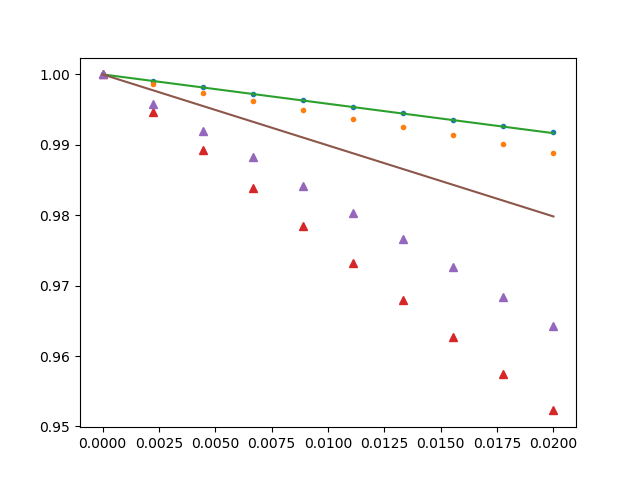

In [125]:
fig, ax = plt.subplots()
ax.plot(epss, K1ps[:,0]/K1ps[0,0], '.')
ax.plot(epss, KD1s[:,0]/K1ps[0,0], '.')
ax.plot(epss, 1-epss/2+epss*.165/2)

ax.plot(epss, K1ps[:,1]+1, '^')
ax.plot(epss, KD1s[:,1]+1, '^')
ax.plot(epss, 1-epss*(1+.165)*np.sin(2*theta))

K point of Brillouin zone transforms as
$$
\frac{\mathbf{K'}}{|\mathbf K|} = (1-\epsilon_{xx}/2-\epsilon_{yy}/2, -2\epsilon_{xy})
$$
[10.1103/PhysRevB.80.045401]

Confirmed x component, but y component is still suspicious... I think we should just keep everything numeric and exact.

In [89]:
-1.165 * eps

-0.0233

# Overhaul classes

In [3]:
from blg_strain.lattice import StrainedLattice

In [4]:
sl = StrainedLattice(eps=0.1, theta=0)

In [5]:
sl.Kp

array([-2.30536649e+00, -7.46579539e-09])

In [6]:
from blg_strain.bands import BandStructure

In [7]:
bs = BandStructure(sl)

In [8]:
bs.calculate(400,400)

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


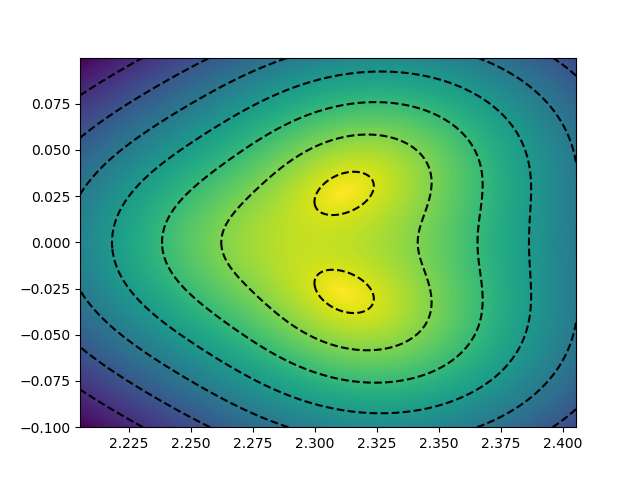

array([[-0.38563012, -0.38743264, -0.38923241, ..., -0.38923246,
        -0.38743269, -0.38563017],
       [-0.38692753, -0.38873256, -0.39053487, ..., -0.39053492,
        -0.38873262, -0.38692758],
       [-0.38822212, -0.39002967, -0.39183449, ..., -0.39183454,
        -0.39002972, -0.38822217],
       ...,
       [-0.40787424, -0.40944721, -0.41101217, ..., -0.41101221,
        -0.40944726, -0.40787428],
       [-0.40629483, -0.4078632 , -0.40942353, ..., -0.40942358,
        -0.40786325, -0.40629488],
       [-0.40471179, -0.40627557, -0.4078313 , ..., -0.40783134,
        -0.40627561, -0.40471184]])

In [10]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[1])
ax.contour(bs.K.Kxa, bs.K.Kya, bs.K.E[1], colors='k')
bs.K.E[2]

In [17]:
bs.K.E[1].max(), bs.K.E[2].min(), bs.Kp.E[1].max(), bs.Kp.E[2].min()

(-0.8738460285996275,
 -0.8721971671417162,
 -0.8738460390198989,
 -0.8721971679278993)

In [12]:
sl.gammans[0]*3 + sl.DeltaAB

0.8754700000000001

In [15]:
zero = bs.get_zero_energy()

<IPython.core.display.Javascript object>


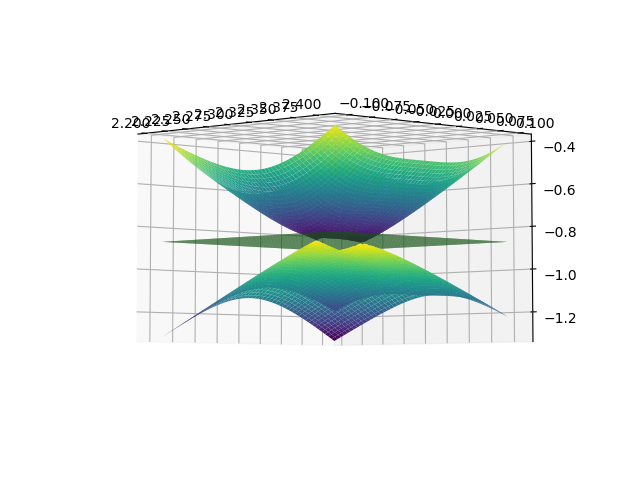

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[2], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[1], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa*zero )

# Repeat investigation of shifting Dirac points

In [1]:
import numpy as np
from blg_strain.lattice import StrainedLattice

In [2]:
sls = []

epss = np.linspace(0, 0.02, 10)
for eps in epss:
    sl = StrainedLattice(eps, theta=0)
    sls.append(sl)
    

In [3]:
K_bzs = np.array([sl.K_bz for sl in sls])
Ks = np.array([sl.K for sl in sls])

In [4]:
fig, ax = plt.subplots()
ax.plot(epss, K_bzs[:,0]/K_bzs[0,0], '.')
ax.plot(epss, Ks[:,0]/K_bzs[0,0], '.')
ax.plot(epss, 1-epss*(1-.165)*2/3)

# ax.plot(epss, K_bzs[:,1]/K_bzs[0,1], '.')
# ax.plot(epss, Ks[:,1]/K_bzs[0,1], '.')
# # ax.plot(epss, 1-epss/2+epss*.165/2)

NameError: name 'plt' is not defined

Still not 100% clear

# Class for quantities depending on $E_F$

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice

In [15]:
from blg_strain.utils.const import K, a0, muB

In [16]:
0.1/a0/1e9

0.7042253521126761

In [17]:
K/a0/1e9

17.030979945861198

In [53]:
sl = StrainedLattice(eps=0.02, theta=np.pi/2)

In [54]:
bs = BandStructure(sl, Delta=0.02)

In [55]:
bs.calculate(400,400)

In [56]:
bs.K.Omega.max(), bs.K.Mu.max()

(4.458962983181443e-16, 9.918684949155956e-23)

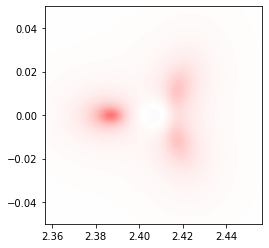

In [57]:
fig, ax = plt.subplots()
# for i in range(4):
#     ax.plot(bs.K.Kxa[:,200], bs.K.E[i][:,200])
# ax.axhline(0)
v = 200 * muB
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, -bs.K.Mu[2], cmap='bwr', vmin=-v, vmax=v)
ax.set_aspect(1)

In [58]:
sl.strain

array([[-3.30000000e-03,  1.42671352e-18],
       [ 1.42671352e-18,  2.00000000e-02]])

In [59]:
fb = FilledBands(bs, EF=0.0083)

In [60]:
fb.EF, fb.bs.E0

(0.0083, 0.0023157748037101952)

In [61]:
fb.calculate()

In [62]:
fb.feq_K.any()

True

In [63]:
from blg_strain.utils.const import mu0, muB

In [64]:
tau = 1e-12
Ex = 100 # V/m
fb.alpha * tau * Ex / mu0

array([7.09758616e+01, 8.65911707e-08])

In [46]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
n, D = fb.get_nD()
n/1e12/1e4, D / 1e9

(0.3427736401559764, 0.07662663220821868)

In [48]:
fb.n1, fb.n1p, fb.n2, fb.n2p

(204619481680360.7, 204619455538081.97, 1509248719099412.8, 1509248745241908.5)

In [49]:
from blg_strain.microscopic import feq_func

In [50]:
feq_func(bs.K.E, 0).any()

False

In [51]:
bs.K.Kxa.shape

(400, 400)

<IPython.core.display.Javascript object>


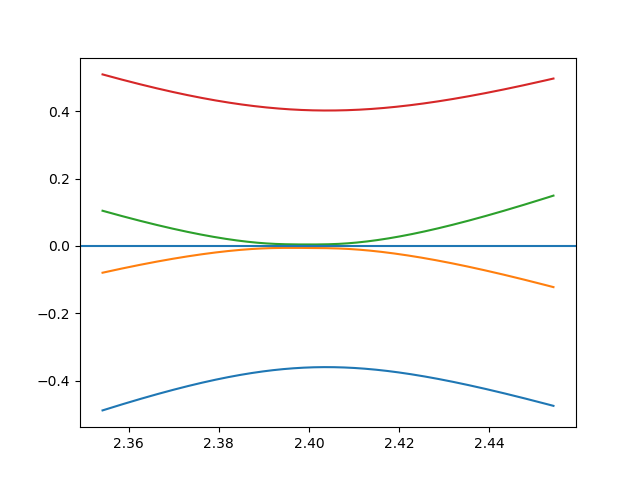

In [52]:
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(bs.K.Kxa[:,200], bs.K.E[i][:,200])
ax.axhline(0)
# ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[2])

<IPython.core.display.Javascript object>


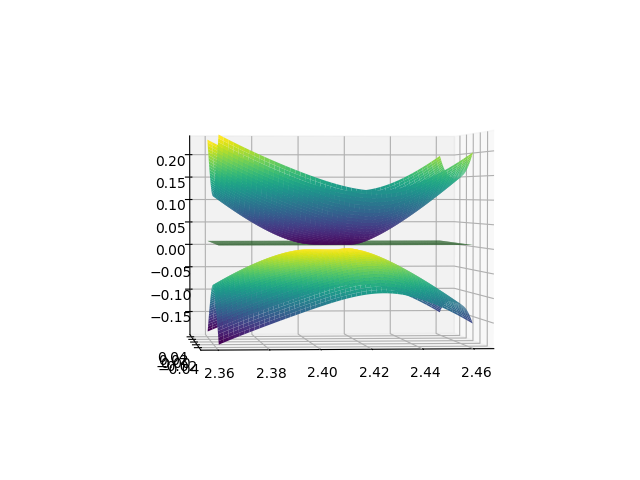

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[2], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[1], cmap='viridis')
# ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa * bs.E0)
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa * (fb.EF))

# Troubleshoot magnitudes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [3]:
sl = StrainedLattice(eps=0.005, theta=0)

In [4]:
bs = BandStructure(sl, Delta=0.01)

In [5]:
bs.calculate(400,400)

In [6]:
H = H_4x4(bs.K._Kxa, bs.K._Kya, sl, Delta=0.01)
dHx = dH_4x4(bs.K._Kxa, bs.K._Kya, sl, xy=0)
dHy = dH_4x4(bs.K._Kxa, bs.K._Kya, sl, xy=1)

In [7]:
Hx = np.gradient(H, bs.K._kxa / a0, axis=-2)
Hy = np.gradient(H, bs.K._kya / a0, axis=-1)

In [8]:
np.allclose(Hx.imag, dHx.imag, rtol=1e-3, atol=1e-3), np.allclose(Hy.imag, dHy.imag, rtol=1e-3, atol=1e-3)

(True, True)

## Check that $\mu\approx \frac{e}{\hbar}{\Omega}E$

In [9]:
from blg_strain.utils.const import q,hbar

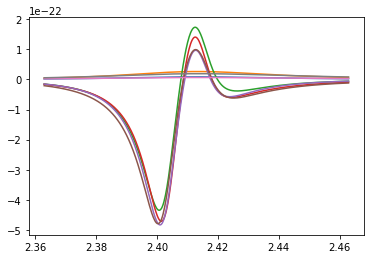

In [10]:
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(bs.K.Kxa[:,200], bs.K.Mu[i][:,200])
    ax.plot(bs.K.Kxa[:,200], bs.K.Omega[i][:,200] * bs.K.E[i][:,200] * q/hbar)
    

# # ax.axhline(0)
# v = 200 * muB
# ax.pcolormesh(bs.K.Kxa, bs.K.Kya, -bs.K.Mu[2], cmap='bwr', vmin=-v, vmax=v)
# ax.set_aspect(1)

## CHeck magnitude of alpha/M

In [38]:
fb = FilledBands(bs, EF=0.0083, T=0)
fb.calculate()

In [39]:
from blg_strain.utils.const import mu0

In [40]:
tau = 1e-12
Ex = 100
fb.alpha * tau * Ex / mu0

array([1.38266434e+01, 5.92868294e-06])

In [41]:
fb.alpha*1e-7

array([1.73750725e-02, 7.45020271e-09])